In [25]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score

### classification

In [2]:
data = pd.read_csv('breast_cancer.csv')
data['diagnosis'] = data['diagnosis'] == 'M'
data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302       True        17.99         10.38          122.80     1001.0   
1    842517       True        20.57         17.77          132.90     1326.0   
2  84300903       True        19.69         21.25          130.00     1203.0   
3  84348301       True        11.42         20.38           77.58      386.1   
4  84358402       True        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

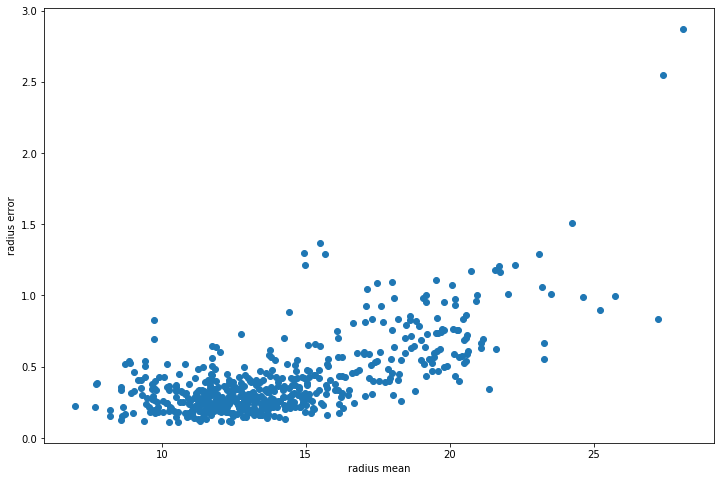

In [3]:
fig, ax = plt.subplots(figsize=(12, 8)) #correlation between predictors
plt.scatter(data['radius_mean'], data['radius_se'])

plt.xlabel('radius mean')
plt.ylabel('radius error')
plt.show()

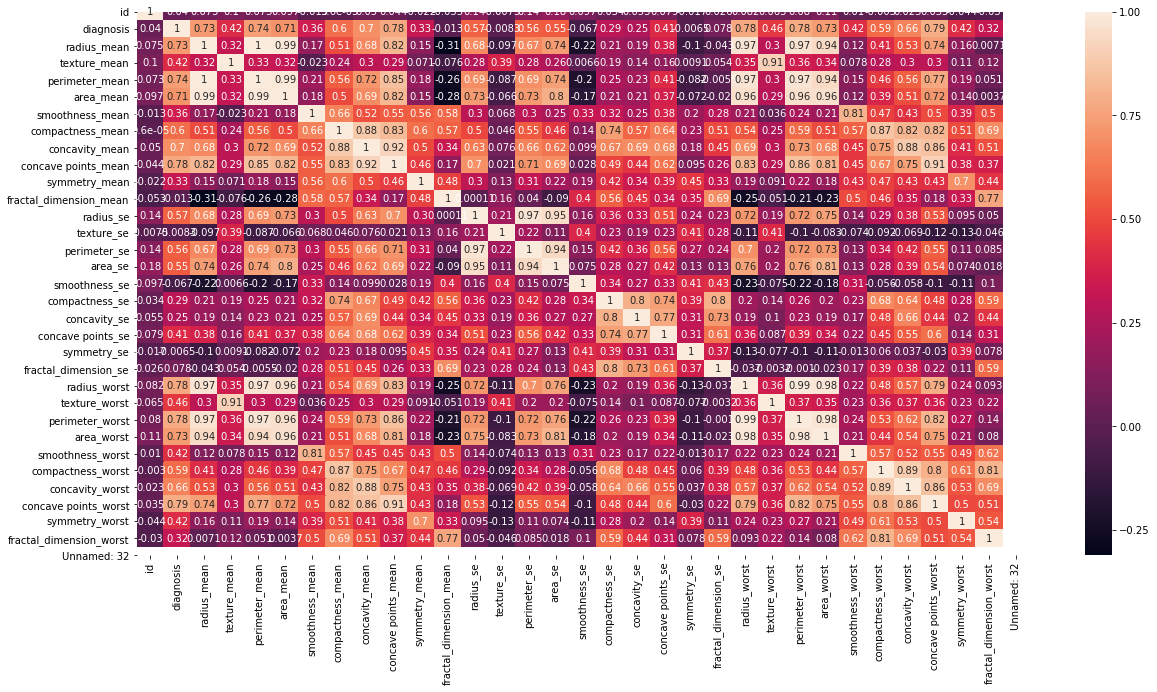

In [4]:
cancer_corr = data.corr()

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cancer_corr, annot=True)
plt.show()

In [5]:
X = data.drop(['diagnosis', 'Unnamed: 32', 'id'], axis=1)
Y = data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
cancer_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

In [6]:
cancer_crosstab

y_test  False  True 
y_pred              
False      70      5
True        1     38

In [9]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('accuracy score: ', acc)
print('precision score: ', prec)
print('recall score:', recall)

accuracy score:  0.9473684210526315
precision score:  0.9743589743589743
recall score: 0.8837209302325582


### regression

In [16]:
kc_house = pd.read_csv('kc_house_data.csv')

kc_house['age'] = 2018 - kc_house['yr_built']
kc_house['renovated'] = kc_house['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
kc_house = kc_house.drop(['yr_built', 'yr_renovated'], axis=1)
kc_house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   zipcode      lat     long  sqft_living15  sqft_lot15  age  renovated  
0    98178  47.5112 -122.257           1340        5650   63          0  
1    98125  47.7210 -122.319           1690        7639   67          1  
2    98028  47.7379 -122.233           2720        8062   85          0  
3    98136  47.5208 -122.393           1360        5000   53          0  
4    98074  47.6168 -122.045           1800        7503   31          0  

[5 rows x 21 columns]

In [17]:
kc_house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement       zipcode           lat  \
count  21613.000000  21611.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.396095     291.509045  98077.939805     47.560053   
std        1.175459    828.128162     442.575043     53.505026      0.138564   
min        1.000000    290.000000       0.000000  98001.000000     47.155900   
25%        7.000000   1190.000000       0.000000  98033.000000     47.471000   
50%        7.000000   1560.000000       0.000000  98065.000000     47.571800   
75%        8.000000   2210.000000     560.000000  98118.000000     47.678000   
max       13.000000   9410.000000    4820.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15           age     renovated  
count  21613.000000   21613.000000   21613.000000  21613.000000  21613.000000  
mean    -122.213896    1986.552492   12768.455652     46.994864      0.042289  
std        0.140828     685.391304   27304.179631     29.373411      0.201253  
min     -122.519000     399.000000     651.000000      3.000000      0.000000  
25%     -122.328000    1490.000000    5100.000000     21.000000      0.000000  
50%     -122.230000    1840.000000    7620.000000     43.000000      0.000000  
75%     -122.125000    2360.000000   10083.000000     67.000000      0.000000  
max     -121.315000    6210.000000  871200.000000    118.000000      1.000000

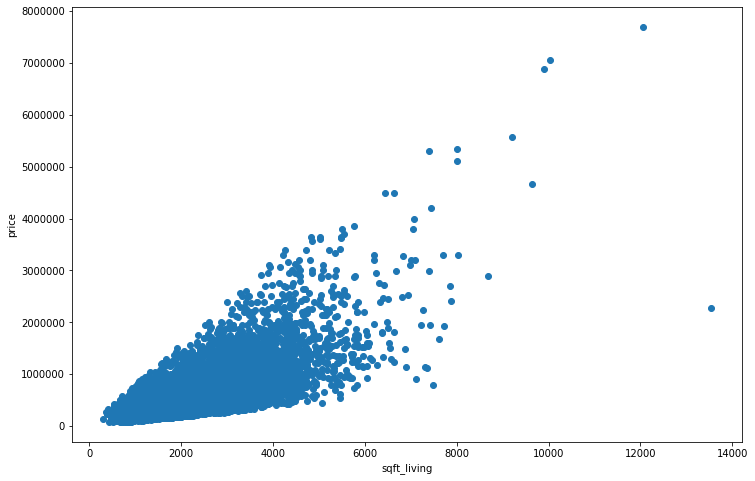

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(kc_house['sqft_living'], kc_house['price'])

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

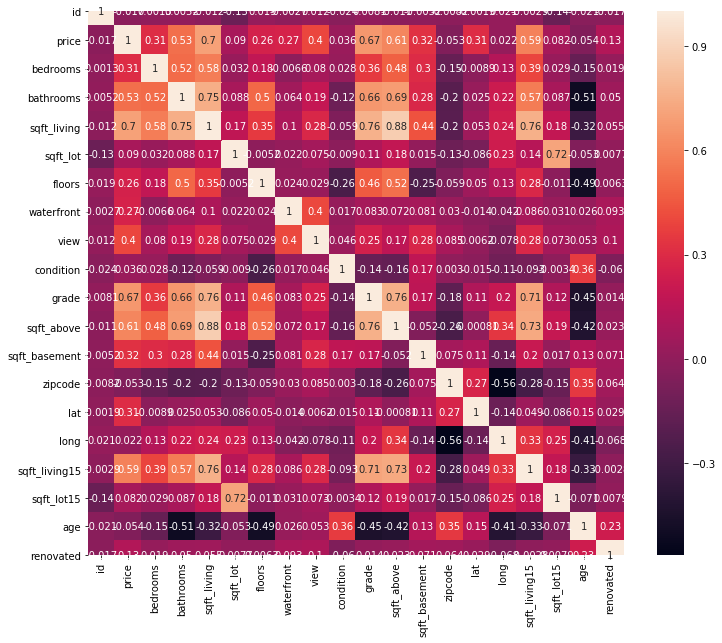

In [21]:
kc_corr = kc_house.corr()
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(kc_corr, annot=True)

In [39]:
kc_house.dropna(inplace=True)
X = kc_house.drop(['id', 'price', 'date'], axis=1)
Y = kc_house['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
reg_model = LinearRegression().fit(x_train, y_train)
print('Training scores', reg_model.score(x_train, y_train))

predictors = x_train.columns
coef = pd.Series(reg_model.coef_, predictors).sort_values()
print (coef)

Training scores 0.6963541105354495
long            -226880.199298
bedrooms         -34760.931760
zipcode            -581.708496
sqft_lot15           -0.332410
sqft_lot              0.161335
sqft_living15        23.335285
sqft_basement        38.212164
sqft_above           70.621088
sqft_living         108.833252
age                2581.106408
floors             4800.181391
condition         26865.883573
bathrooms         40270.634425
renovated         45443.782412
view              52685.278329
grade             95801.347822
waterfront       545489.177543
lat              600805.701087
dtype: float64


In [41]:
y_pred = reg_model.predict(x_test)
print('Testing scores: ', r2_score(y_test, y_pred))

Testing scores:  0.7116673417361786


In [43]:
import statsmodels.api as sm
x_train_with_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_const)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2330.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:            -2.3562e+05
No. Observations:               17288   AIC:                         4.713e+05
Df Residuals:                   17270   BIC:                         4.714e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.738e+04   3.22e+06     -0.018

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
